<a href="https://colab.research.google.com/github/Julialunna/Artificial-Intelligence/blob/main/Federated_Learning/Flower_Course/MNIST_and_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving utils1.py to utils1.py


{'utils1.py': b'"""\nUtility functions and classes for Jupyter Notebooks lessons. \n"""\n\nimport torch\nimport torch.nn as nn\nfrom torch.utils.data import Subset, DataLoader, random_split\nimport torch.optim as optim\nfrom torchvision import datasets, transforms\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\n\ntransform = transforms.Compose(\n    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]\n)\n\n\nclass SimpleModel(nn.Module):\n    def __init__(self):\n        super(SimpleModel, self).__init__()\n        self.fc = nn.Linear(784, 128)\n        self.relu = nn.ReLU()\n        self.out = nn.Linear(128, 10)\n\n    def forward(self, x):\n        x = torch.flatten(x, 1)\n        x = self.fc(x)\n        x = self.relu(x)\n        x = self.out(x)\n        return x\n\n\ndef train_model(model, train_set):\n    batch_size = 64\n    num_epochs = 10\n\n    train_loader = DataLoader(train_set, batch_size=ba

In [ ]:
from utils1 import *
trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.01MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



In [ ]:
#spliting the dataset for 3 users
total_length = len(trainset)
split_size = total_length // 3

#garantee part1, part2 and part3 will always be divided the same way
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

In [ ]:
#simulating the different datasets that normally are available in real world
#exclude_digits was provided by utils1
part1 = exclude_digits(part1, excluded_digits=[1,3,7])
part2 = exclude_digits(part2, excluded_digits=[2,5,8])
part3 = exclude_digits(part3, excluded_digits=[4,6,9])

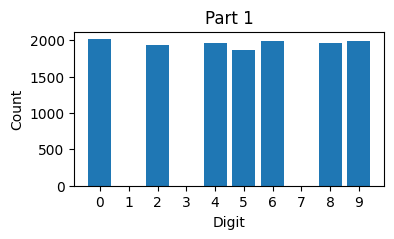

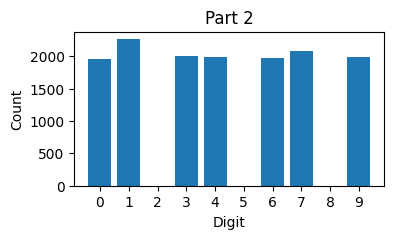

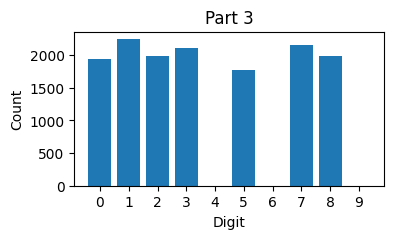

In [ ]:
#graphing the plot distribution,function provided by uttils1
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

In [ ]:
#SimpleModel() is a neural network implemented in PyTorch with just two full connected layers
#train_model has 3 epochs
model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.4970384649261161
Epoch 2: Loss = 0.25920433636654067
Epoch 3: Loss = 0.19885337377923565
Epoch 4: Loss = 0.16703526167249358
Epoch 5: Loss = 0.1374537765409227
Epoch 6: Loss = 0.11534061491371947
Epoch 7: Loss = 0.09809749829373113
Epoch 8: Loss = 0.08562183100730181
Epoch 9: Loss = 0.07556183585846746
Epoch 10: Loss = 0.06717150446514154
Training complete


In [ ]:
model1 = SimpleModel()
train_model(model1, part1)
model2 = SimpleModel()
train_model(model2, part2)

Epoch 1: Loss = 0.4951677582984747
Epoch 2: Loss = 0.2423358987237132
Epoch 3: Loss = 0.19357951205483703
Epoch 4: Loss = 0.15564361893853476
Epoch 5: Loss = 0.13416876279164192
Epoch 6: Loss = 0.10884703710501971
Epoch 7: Loss = 0.0936977970132301
Epoch 8: Loss = 0.07736468863088725
Epoch 9: Loss = 0.06677426838770856
Epoch 10: Loss = 0.06053616429657437
Training complete
Epoch 1: Loss = 0.39977005277095096
Epoch 2: Loss = 0.18134871382166498
Epoch 3: Loss = 0.151376020346236
Epoch 4: Loss = 0.13532975175517745
Epoch 5: Loss = 0.11493722103685806
Epoch 6: Loss = 0.10712869280749666
Epoch 7: Loss = 0.08711415841077853
Epoch 8: Loss = 0.07995401672503379
Epoch 9: Loss = 0.07127729635560952
Epoch 10: Loss = 0.0660948239580778
Training complete
